In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score,recall_score, precision_score,accuracy_score

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [100]:
data.describe().T    #numerical columns

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [101]:
data.describe(include='object').T    #categorical columns

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


## Univariate and Bivariate analysis

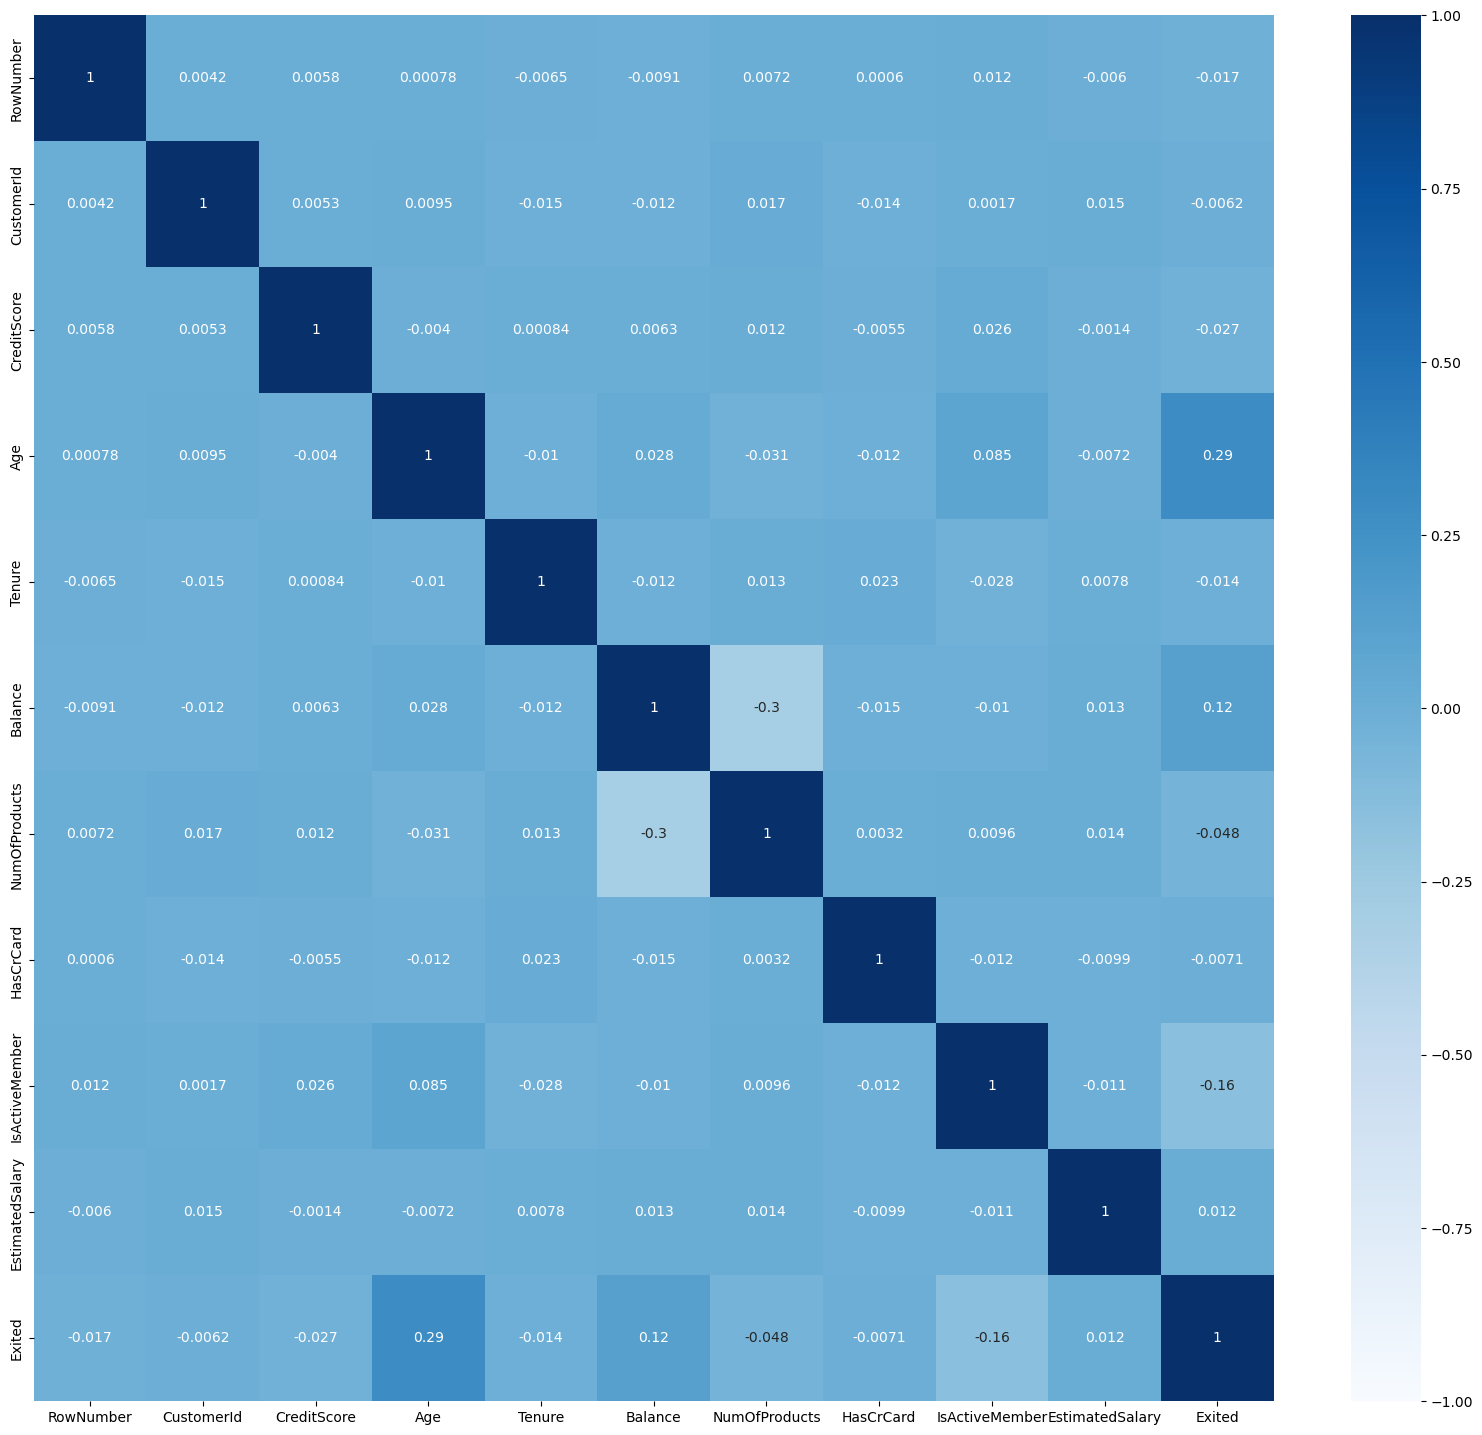

In [102]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(numeric_only=True),annot=True,vmax=1,vmin=-1,cmap='Blues')
plt.show()

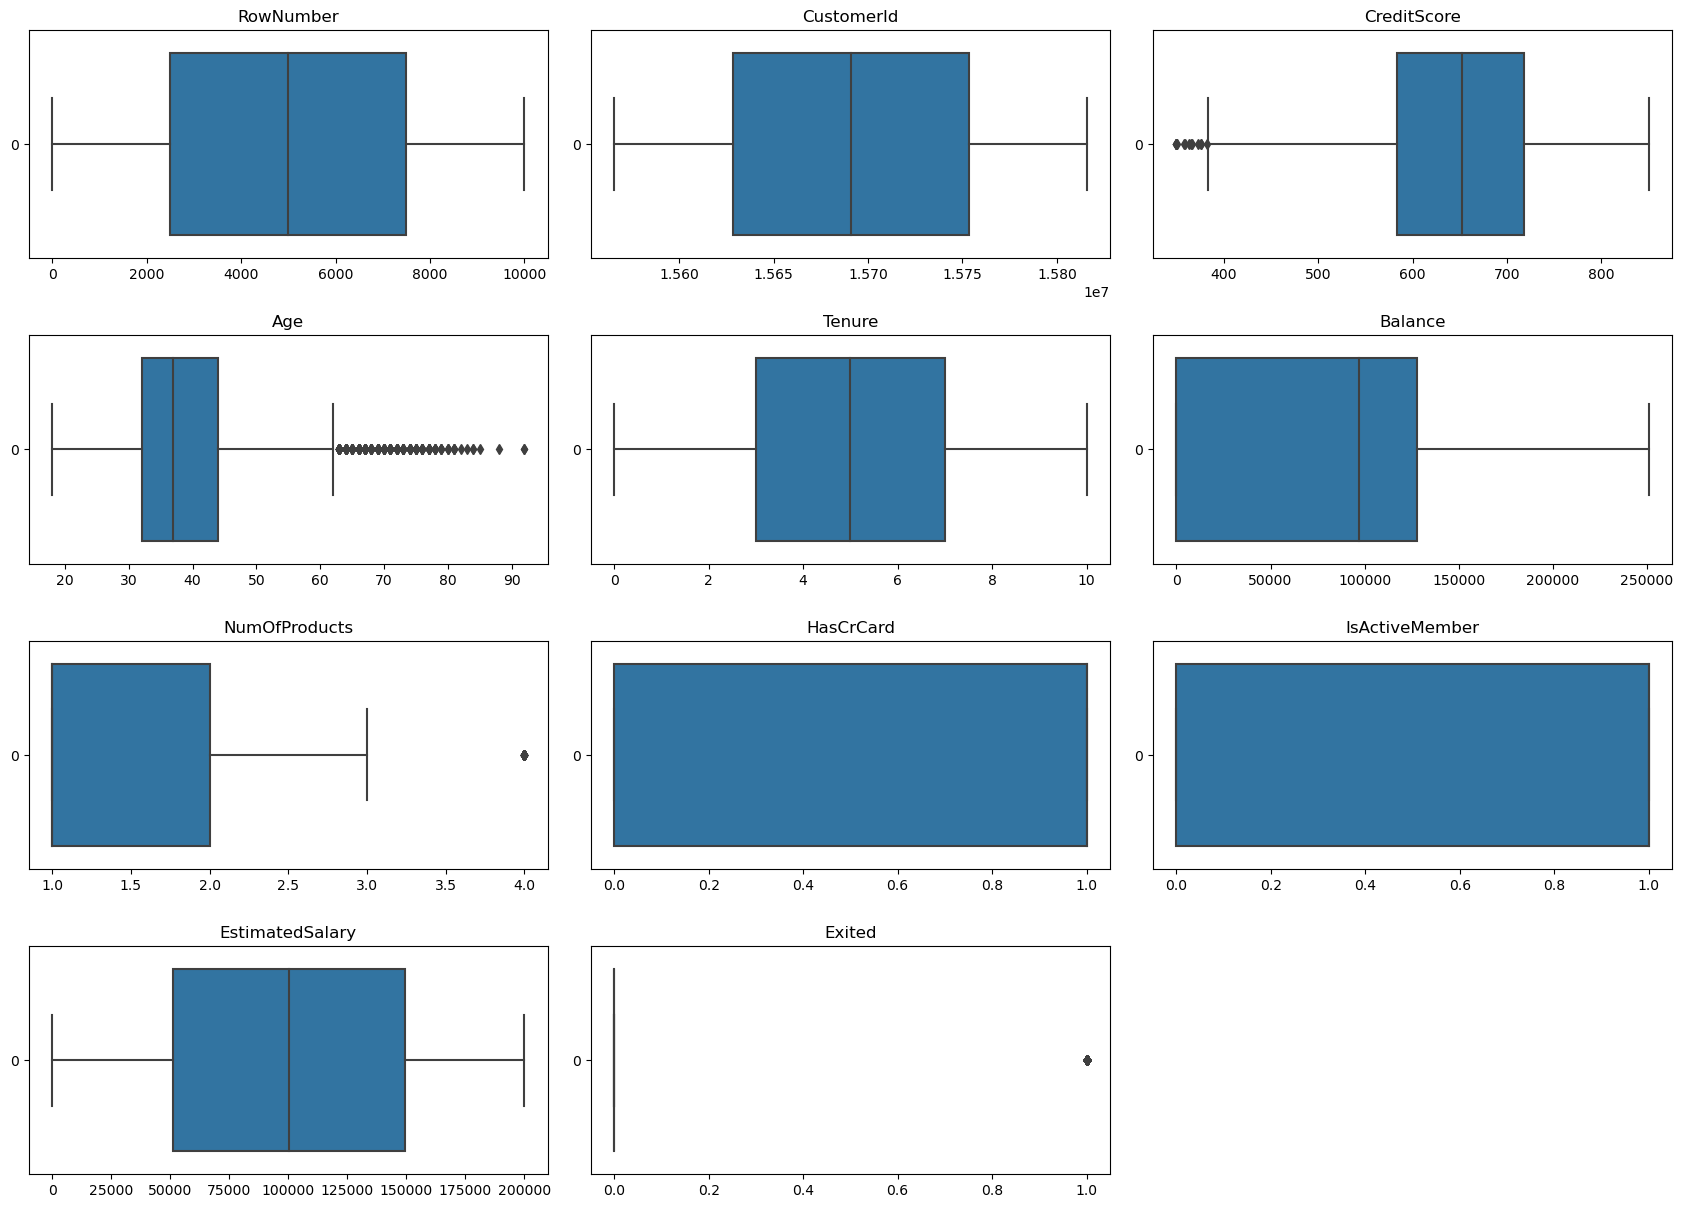

In [103]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    plt.subplot(5,3,t)
    sns.boxplot(data[i],orient='h')
    plt.title(i)
    t=t+1
plt.tight_layout()  
plt.show()

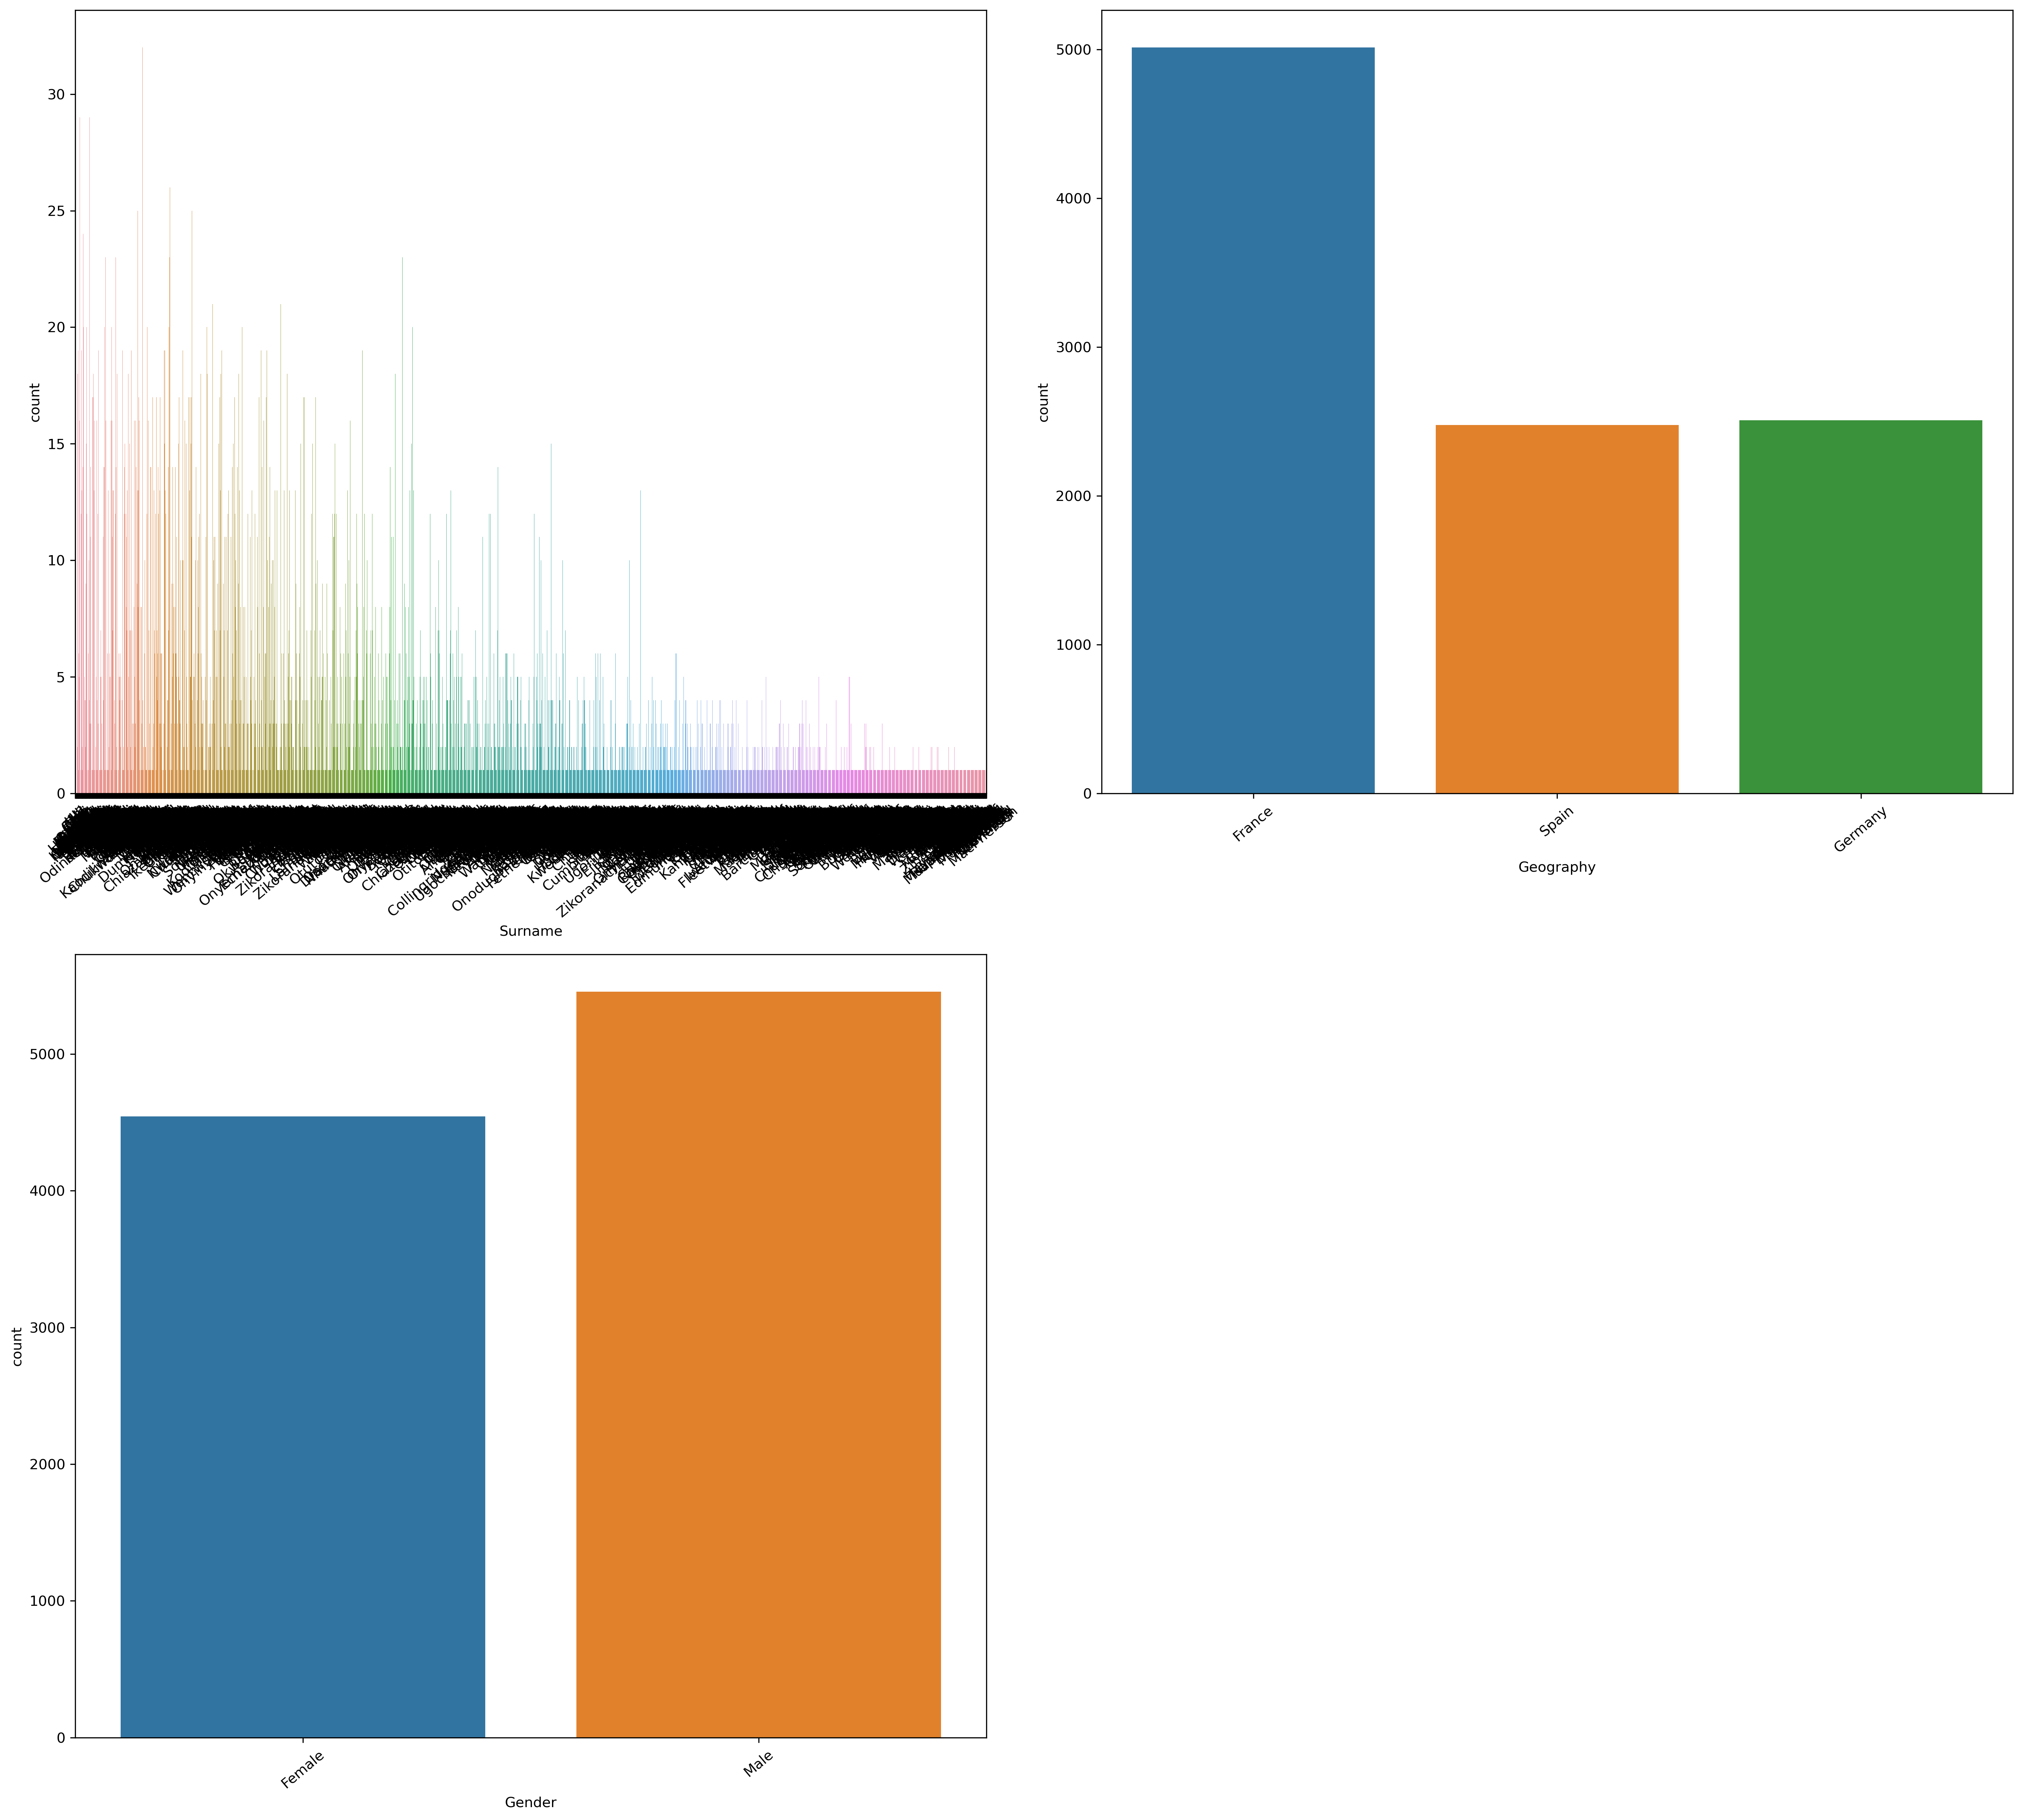

In [104]:
plt.figure(figsize=(20,18),dpi=300)
t=1
for i in data.select_dtypes(include='object').columns:
    plt.subplot(2,2,t)
    sns.countplot(data=data,x=i)
    plt.xticks(rotation=40)
    t=t+1
plt.tight_layout()
plt.show()

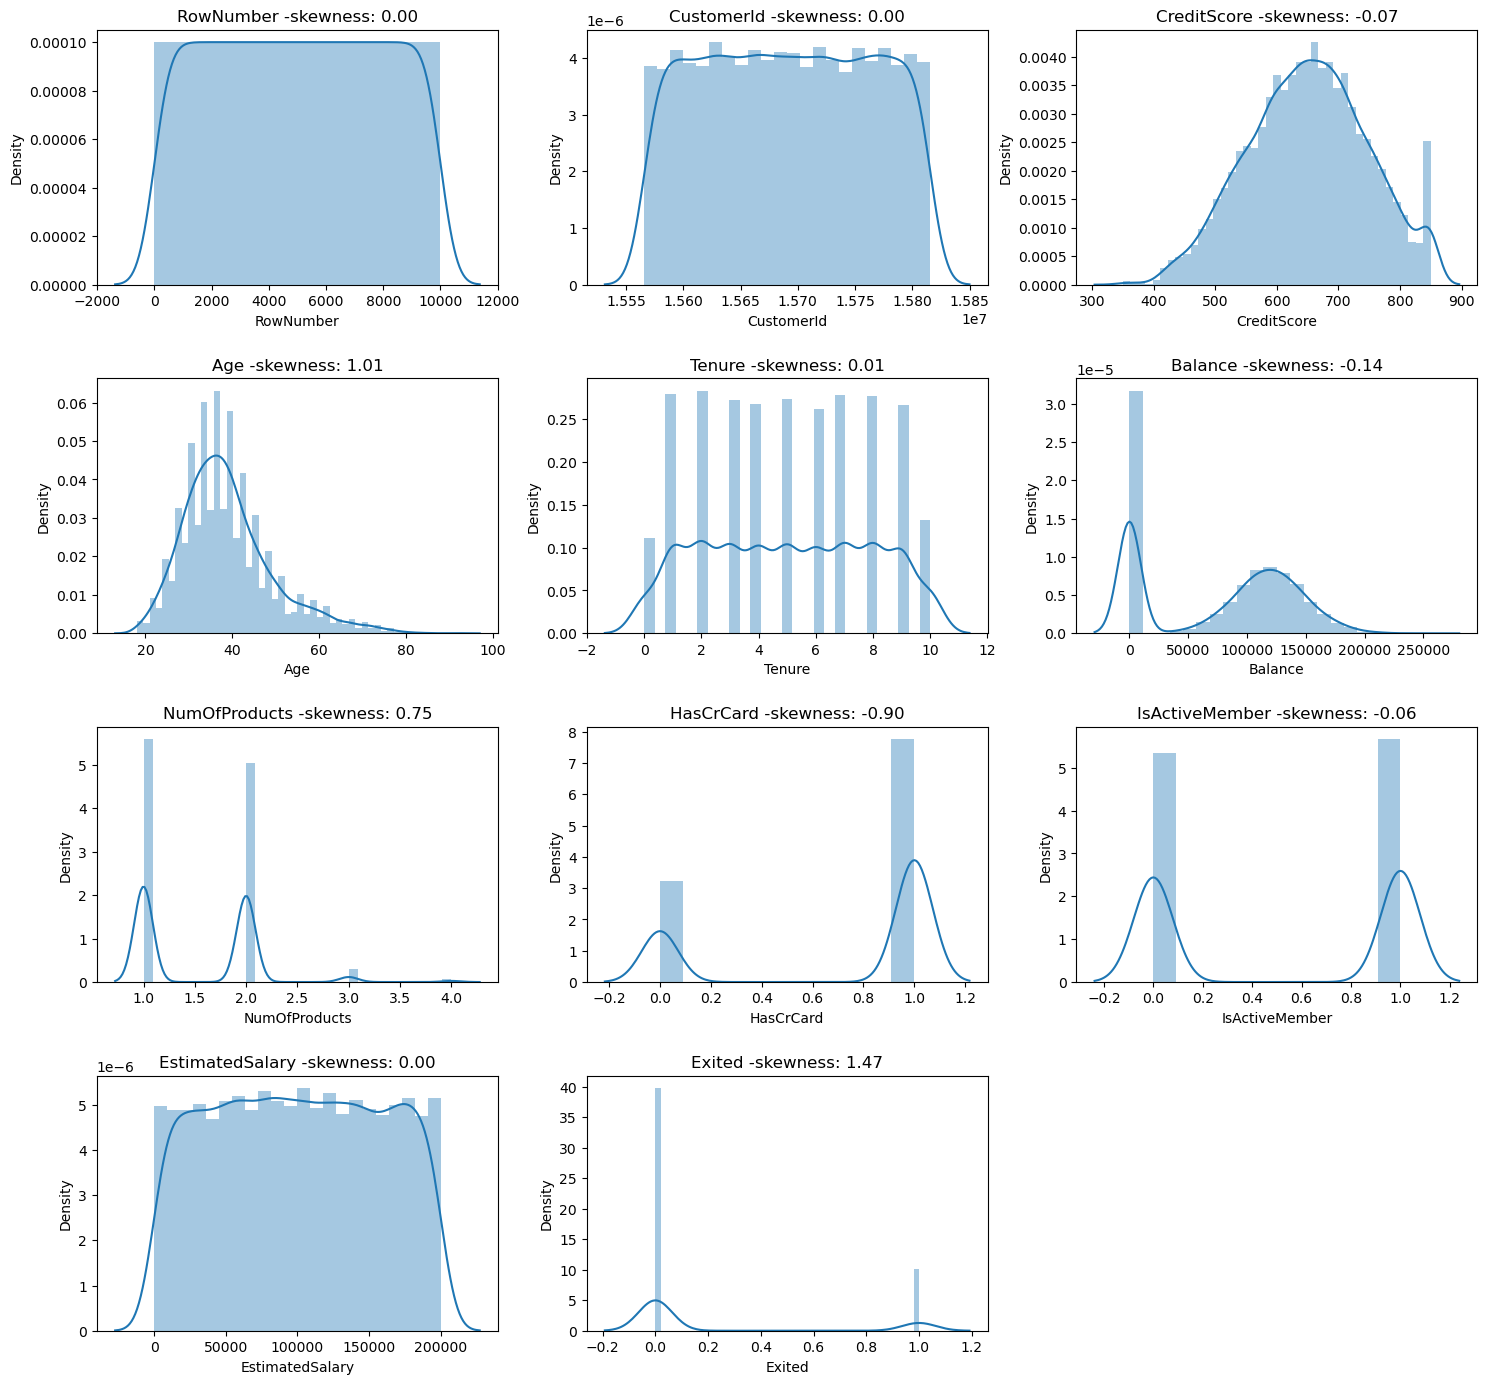

In [105]:
plt.figure(figsize=(15,17))
t=1
for i in data.select_dtypes(include=np.number).columns:
    plt.subplot(5,3,t)
    sns.distplot(data[i])
    plt.title('%s -skewness: %.2f'%(i,data[i].skew()))
    t=t+1
plt.tight_layout()
plt.show()

## Data Preprocessing

In [106]:
# missing values
data.isnull().sum()     ### no missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [107]:
### check the presence of outliers
# checked in the above codes. there are outliers in 'CreditScore', 'age','NumOfProducts','exited'

In [108]:
### feature selection

In [109]:
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [110]:
#drop row number, customerID, Surname as they are not important for predictions

data.drop(columns=['RowNumber', 'CustomerId','Surname'], inplace=True)

In [111]:
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [112]:
# 'Geography and 'Gender' are categorical so convert them into numeric using one hot encoding after the split to avoid data leakage

In [113]:
x=data.drop(columns='Exited')
y=data['Exited']

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9, random_state=2, stratify=y)

In [115]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(9000, 10) (9000,) (1000, 10) (1000,)


In [116]:
## frequency encoding for geography
x_train['Geography'].value_counts()

Geography
France     4506
Germany    2248
Spain      2246
Name: count, dtype: int64

In [117]:
# storing the above data in dict format

geo_encoding = x_train['Geography'].value_counts().to_dict()

In [118]:
geo_encoding

{'France': 4506, 'Germany': 2248, 'Spain': 2246}

In [119]:
x_train['Geography'] = x_train['Geography'].map(geo_encoding)
x_test['Geography'] = x_test['Geography'].map(geo_encoding)

In [120]:
x_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8004,615,4506,Male,45,5,0.00,2,1,1,164886.64
5644,738,2246,Female,37,8,100565.94,1,1,1,128799.86


In [121]:
#dummy encoding for gender
x_train = pd.get_dummies(x_train, drop_first=True,dtype=int)
x_test = pd.get_dummies(x_test, drop_first=True,dtype=int)

In [122]:
x_train.shape

(9000, 10)

In [123]:
x_test.shape

(1000, 10)

In [124]:
x_train.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
8004,615,4506,45,5,0.00,2,1,1,164886.64,1
5644,738,2246,37,8,100565.94,1,1,1,128799.86,0
1931,573,4506,26,4,129109.02,1,0,0,149814.68,0
4432,621,2246,33,4,0.00,2,1,1,40299.23,1
9792,819,2246,28,8,168253.21,1,1,1,102799.14,0


# Predictive Modelling

In [125]:
accu = []        #accuracy
recl = []        #recall
prec = []        #precision
f1 = []          #f1 score
model_name = []


def model_validation(model, xtrain, ytrain, xtest,ytest):
    m=model
    m.fit(xtrain,ytrain)
    pred_h = m.predict(xtest)
    pred_s = m.predict_proba(xtest)[:,1]
    print('classification Report:\n', classification_report(ytest,pred_h))
    
    fpr,tpr,thre = roc_curve(ytest,pred_s)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.plot(fpr,tpr)
    plt.show()
    
    resp = input('Do you want to keep this model? Yes')
    if resp.lower()=='yes':
        model_name.append(str(m))
        accu.append(accuracy_score(y_test,pred_h))
        recl.append(recall_score(y_test,pred_h))
        prec.append(precision_score(y_test,pred_h))
        f1.append(f1_score(y_test,pred_h))
        global df_score
        df_score = pd.DataFrame({'Model':model_name, 
                                 'Accuracy':accu,
                                 'Recall': recl, 
                                 'Precision':prec,
                                 'F1 Score': f1})
        return m

# Decision Tree

classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.42      0.53       204

    accuracy                           0.85      1000
   macro avg       0.80      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



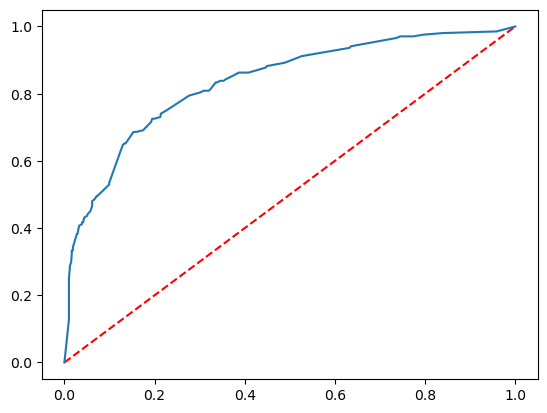

Do you want to keep this model? Yesyes


In [126]:
dt= model_validation(DecisionTreeClassifier(max_depth=8),
                    x_train,y_train,x_test,y_test)


# Naive Bayes

In [127]:
from sklearn.naive_bayes import GaussianNB

classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       796
           1       0.33      0.08      0.13       204

    accuracy                           0.78      1000
   macro avg       0.57      0.52      0.50      1000
weighted avg       0.71      0.78      0.72      1000



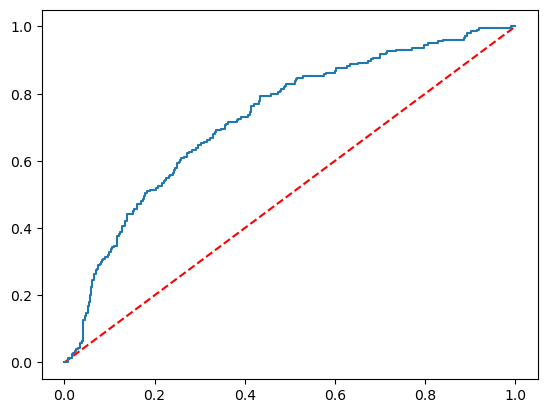

Do you want to keep this model? Yesyes


In [128]:
nb = model_validation(GaussianNB(),x_train, y_train,x_test,y_test)

# Random Forest

classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.91       796
           1       0.76      0.43      0.55       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.73      1000
weighted avg       0.85      0.86      0.84      1000



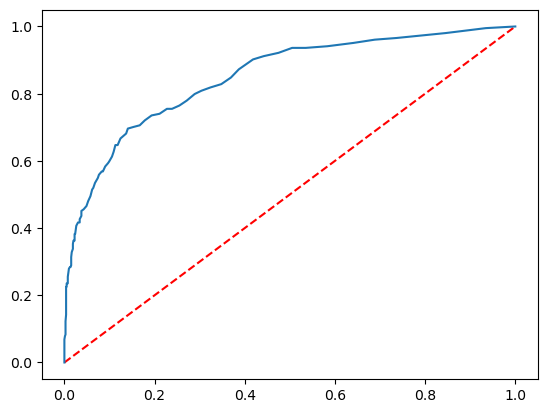

Do you want to keep this model? Yesyes


In [129]:
rf = model_validation(RandomForestClassifier(n_estimators=100),x_train, y_train,x_test,y_test)

In [130]:
df_score

,Model,Accuracy,Recall,Precision,F1 Score
0,DecisionTreeClassifier(max_depth=8),0.850,0.416667,0.732759,0.531250
1,GaussianNB(),0.780,0.078431,0.333333,0.126984
2,RandomForestClassifier(),0.856,0.426471,0.763158,0.547170


# ADABoost 

classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.71      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



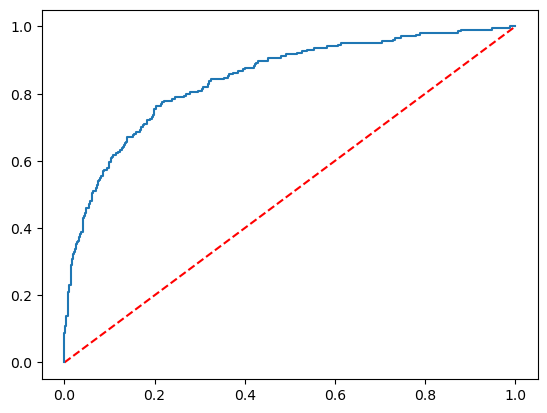

Do you want to keep this model? Yesyes


In [131]:
ada = model_validation(AdaBoostClassifier(n_estimators=150),
                      x_train, y_train,x_test,y_test)

# Gradient Boosting

classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       796
           1       0.78      0.47      0.58       204

    accuracy                           0.86      1000
   macro avg       0.83      0.72      0.75      1000
weighted avg       0.86      0.86      0.85      1000



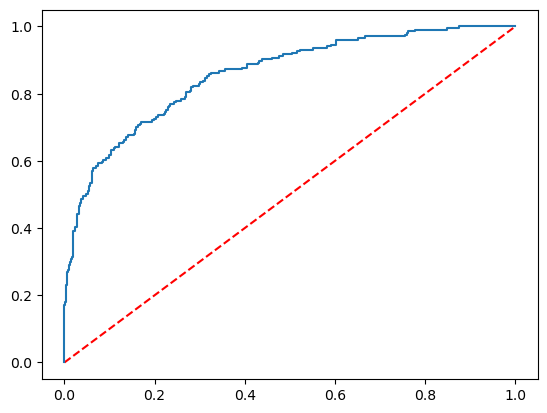

Do you want to keep this model? Yesyes


In [132]:
gbc = model_validation(GradientBoostingClassifier(n_estimators=100,max_depth=5),
                      x_train, y_train,x_test,y_test)

# XGBoost 

In [133]:
from xgboost import XGBClassifier

classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       796
           1       0.65      0.48      0.55       204

    accuracy                           0.84      1000
   macro avg       0.76      0.70      0.73      1000
weighted avg       0.83      0.84      0.83      1000



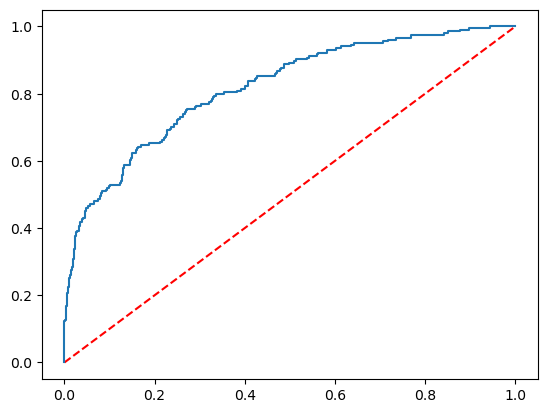

Do you want to keep this model? Yesno


In [134]:
xgb = model_validation(XGBClassifier(n_estimators=200,max_depth=7),
                      x_train, y_train,x_test,y_test)

# Voting

In [135]:
base_models = [('DT', DecisionTreeClassifier(max_depth=8)),
               ('RF', RandomForestClassifier(n_estimators=150,max_depth=13)),
               ('ADABoost', AdaBoostClassifier(n_estimators=200)),
               ('GB', GradientBoostingClassifier(n_estimators=150,max_depth=10))]

classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.77      0.44      0.56       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



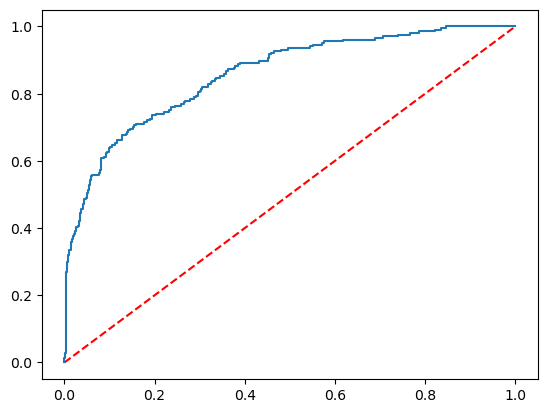

Do you want to keep this model? Yesyes


In [136]:
voting = model_validation(VotingClassifier(estimators=base_models, voting='soft'), 
                         x_train, y_train,x_test,y_test)

In [137]:
df_score

,Model,Accuracy,Recall,Precision,F1 Score
0,DecisionTreeClassifier(max_depth=8),0.850,0.416667,0.732759,0.531250
1,GaussianNB(),0.780,0.078431,0.333333,0.126984
2,RandomForestClassifier(),0.856,0.426471,0.763158,0.547170
3,AdaBoostClassifier(n_estimators=150),0.850,0.441176,0.714286,0.545455
4,GradientBoostingClassifier(max_depth=5),0.864,0.465686,0.778689,0.582822
5,"VotingClassifier(estimators=[('DT', DecisionTr...",0.858,0.436275,0.767241,0.556250


# Stacking

classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       796
           1       0.60      0.47      0.53       204

    accuracy                           0.83      1000
   macro avg       0.74      0.70      0.71      1000
weighted avg       0.82      0.83      0.82      1000



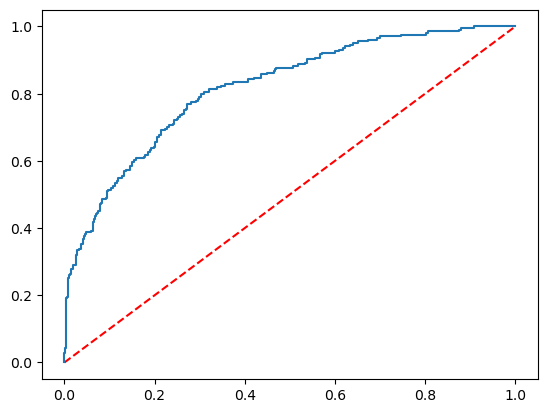

Do you want to keep this model? Yesyes


In [138]:
stacking = model_validation(StackingClassifier(estimators=base_models, final_estimator=XGBClassifier(n_estimators=200,max_depth=10)),
                           x_train, y_train,x_test,y_test)

In [139]:
df_score

,Model,Accuracy,Recall,Precision,F1 Score
0,DecisionTreeClassifier(max_depth=8),0.850,0.416667,0.732759,0.531250
1,GaussianNB(),0.780,0.078431,0.333333,0.126984
2,RandomForestClassifier(),0.856,0.426471,0.763158,0.547170
3,AdaBoostClassifier(n_estimators=150),0.850,0.441176,0.714286,0.545455
4,GradientBoostingClassifier(max_depth=5),0.864,0.465686,0.778689,0.582822
5,"VotingClassifier(estimators=[('DT', DecisionTr...",0.858,0.436275,0.767241,0.556250
6,"StackingClassifier(estimators=[('DT', Decision...",0.828,0.470588,0.600000,0.527473


In [140]:
# Fine tuning XGBoost
grid = {'n_estimators':[100,150,200,250,300,350],
        'gamma':[0,1,2,3],
        'max_depth':[7,10,13,16,19]}

In [141]:
gscv_xgb = GridSearchCV(estimator=XGBClassifier(),
                       param_grid=grid,
                       scoring='recall',
                       cv=5,
                       verbose=1)

In [142]:
gscv_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 1, 2, 3],
                         'max_depth': [7, 10, 13, 16, 19],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='recall', verbose=1)

In [143]:
gscv_xgb.best_score_

0.498615267789342

# Feature Selection

# Final Model

classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       796
           1       0.61      0.50      0.55       204

    accuracy                           0.83      1000
   macro avg       0.75      0.71      0.72      1000
weighted avg       0.82      0.83      0.83      1000



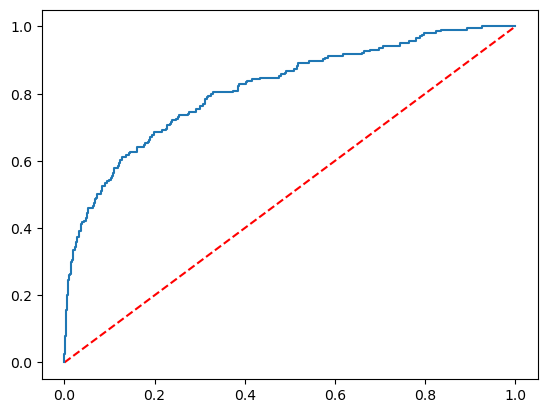

Do you want to keep this model? Yesyes


In [144]:
final_model = model_validation(XGBClassifier(**gscv_xgb.best_params_),
                              x_train, y_train,x_test,y_test)

# Prediction

In [145]:
x_test.head(1)


,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
4985,554,2248,26,4,121365.39,1,1,1,8742.36,1


In [146]:
geo_encoding

{'France': 4506, 'Germany': 2248, 'Spain': 2246}

In [147]:
final_model.predict(([[675,4506,35,4,12000,2,1,0,60000,0]]))[0]

0

In [148]:
final_model.predict(([[675,2246,35,4,12000,2,1,0,60000,0]]))[0]

0

# Save the fitted model

In [149]:
import pickle

In [150]:

with open('final_model.pkl','wb') as file:
    pickle.dump(final_model,file)

In [151]:
# the file is saved with the same name

In [152]:
# opened new file(deploy customer churn) in the same location.